In [21]:
# necessary packages:

import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
# import necessary library:
# This is the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D
# read relevant files to plot the true prism, the point sources and the 
# plane all together: # the prism extent in all 3 directions:
# plots in cells of jupyter:
#%matplotlib inline     

In [19]:
# read data file:
fp = np.loadtxt('Prisma.txt')
# read coeficients of the plane:
f1 = np.loadtxt('coefsPlanoFinal.txt')
# read the point sources coordinates:
f2 = np.loadtxt('Dipolos.txt')


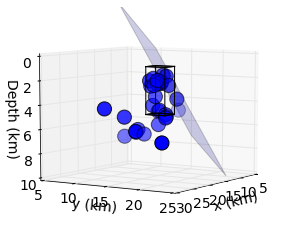

In [23]:
# plot the prism:

x1 = fp[0,0]
x2 = fp[1,0]

y1 = fp[0,1]
y2 = fp[1,1]

z1 = fp[0,2]
z2 = fp[1,2]

fs = 14 # font size 

fig = plt.figure(1)
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

#draw rectangle:
rx = [x1, x2]
ry = [y1, y2]
rz = [z1, z2]

# the 3D plot limits:
xmax = 30;
xmin = 5;

ymax = 25;
ymin = 5;

zmax = +10;
zmin = +0;
#rz = [0,2]

for s, e in combinations(np.array(list(product(rx,ry,rz))), 2):
        
    if np.sum(np.abs(s-e)) == ry[1]-ry[0]:
        ax.plot3D(*zip(s,e), color="k")
        ax.set_xlim3d(xmin, xmax)
        ax.set_ylim3d(ymin, ymax)
        ax.set_zlim3d(zmin, zmax)
        plt.gca().invert_zaxis()    
      
    if np.sum(np.abs(s-e)) == rx[1]-rx[0]:
        ax.plot3D(*zip(s,e), color="k")
        ax.set_xlim3d(xmin, xmax)
        ax.set_ylim3d(ymin, ymax)
        ax.set_zlim3d(zmin, zmax)
        plt.gca().invert_zaxis()

    if np.sum(np.abs(s-e)) == rz[1]-rz[0]:
        ax.plot3D(*zip(s,e), color="k")
        ax.set_xlim3d(xmin, xmax)
        ax.set_ylim3d(ymin, ymax)
        ax.set_zlim3d(zmin, zmax)
        plt.gca().invert_zaxis()

        # set labelsize:        
        plt.tick_params(axis='y', labelsize=fs)
        plt.tick_params(axis='x', labelsize=fs)
        plt.tick_params(axis='z', labelsize=fs)
       
        ax.set_xlabel('x (km)',fontsize=fs)
        ax.set_ylabel('y (km)',fontsize=fs)
        ax.set_zlabel('Depth (km)',fontsize=fs)        
        ax.view_init(10, 48)
        
        #plt.show() 
        #plt.savefig('prism.pdf')
        
###############################################################################
# SECOND PART: PLOT THE BALLS AND THE PLANE
###############################################################################
        

# coordinates of each point source:
xs = (f2[:,0])
ys = (f2[:,1])
zs = (f2[:,2])

# save the coefficients of the plane in more mnemonic variables:
a = f1[0] #f1[5]
b = f1[1] #f1[6]
c = f1[2] #f1[7]
d = f1[3] #f1[8]

# plot the 3D plane:
x = np.linspace(14, 25, num=30)
y = np.linspace(14, 25, num=30)
xp, yp = np.meshgrid(x,y) # x,x = square mesh
zp = (-a*xp - b*yp - d)/ c

# plot the surface
#ax = plt.figure().gca(projection='3d')
ax.plot_surface(xp, yp, zp, rstride=30, cstride=30, alpha=0.2, cmap=plt.colors() )
ax.scatter(xs,ys,zs,c=(0,0,1),marker='o', s=[200] )
ax.view_init(7, 33)
plt.show()   
plt.savefig('sol_no_reg.pdf') 
plt.close()